In [89]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
import random
import os

In [98]:
# 遍历读取数据，存放高维矩阵
file_pathname=r'C:\Users\pc\Desktop\大三の绝处逢生\计算智能\week10\code\mnist_test\8'
n=1000
IMAGE = np.zeros((n,28,28))
for filename in os.listdir(file_pathname):
    if n:
        IMAGE[900-n,:,:] = np.array(Image.open(file_pathname+'\\'+filename).convert('L'))
        n-=1

print(IMAGE.shape)

(1000, 28, 28)


In [99]:
def gauss_noise(matrix, sigma):
    mu = 0 # 高斯噪声的第一个参数mu
    # 高斯噪声的第二个参数sigma在这里写成了由调用此函数的函数输入

    # 1. 因为是向多维矩阵中的元素逐个添加高斯噪声，所以要先获取矩阵的大小。这里我因为事先知道输入的矩阵大小，所以没有做特殊情况的判断，直接获取channel大小、矩阵行数height和矩阵列数width。
    height = len(matrix)
    width = len(matrix[0])

    # 2. 遍历多维矩阵中的元素，逐个添加高斯噪声
    for i in range(0, height):
        for j in range(0, width):
             matrix[i][j] += random.gauss(mu, sigma)
    
    return matrix


for i in range(n):
    IMAGE[i,:,:]=gauss_noise(IMAGE[i,:,:], 0.15)
    
# print(IMAGE)

In [100]:
#标准化数据，只有0和1的值
def normalize_data(data):  # 0.1<=data[i][j]<=0.9
    data = (data - np.mean(data)) / np.std(data)
    rows,cols = data.shape
    for i in range(rows):
        for j in range(cols):
            if (data[i,j] > 0):
                data[i,j] = 1
            else:
                data[i,j] = 0
    return data

for i in range(n):
    IMAGE[i,:,:]=normalize_data(IMAGE[i,:,:])
    
# print(IMAGE)


In [101]:
# 定义网络结构
rbm1 = BernoulliRBM(n_components=60, learning_rate=0.01, batch_size=10, n_iter=100, verbose=True, random_state=0)
rbm2 = BernoulliRBM(n_components=200, learning_rate=0.03, batch_size=30, n_iter=50, verbose=True, random_state=12)
rbm3 = BernoulliRBM(n_components=200, learning_rate=0.03, batch_size=30, n_iter=50, verbose=True, random_state=123)

In [102]:

def training(img0):
    #step1
    rbm1.fit(img0)
    #得到权值矩阵、隐藏层偏置值和显示层的偏置值
    weight = rbm1.components_
    baise = rbm1.intercept_hidden_
    baise_vis = rbm1.intercept_visible_

    #逆向还原输入的图片
    hidden_img = np.dot(img0, weight.T) + baise
    mid1 = np.dot(hidden_img, weight) + baise_vis


    # step2
    rbm2.fit(mid1)
    weight = rbm2.components_
    baise = rbm2.intercept_hidden_
    baise_vis = rbm2.intercept_visible_


    hidden_img = np.dot(mid1, weight.T) + baise
    mid2 = np.dot(hidden_img, weight) + baise_vis


    # step3
    rbm3.fit(mid2)
    weight = rbm3.components_
    baise = rbm3.intercept_hidden_
    baise_vis = rbm3.intercept_visible_


    hidden_img = np.dot(mid2, weight.T) + baise
    reverimg = np.dot(hidden_img, weight) + baise_vis
    
    return reverimg

In [103]:
result=np.zeros((n,28,28))
# training loop
for i in range(n):
    result[i,:,:]=training(IMAGE[i,:,:])


[BernoulliRBM] Iteration 1, pseudo-likelihood = -17.69, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -16.34, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -15.24, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -14.30, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -13.62, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -13.19, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -12.68, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -12.37, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -12.01, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -11.77, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -11.60, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -11.45, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -11.37, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -11.11, time = 0.00s
[BernoulliRBM] Iteration 15, 

[BernoulliRBM] Iteration 4, pseudo-likelihood = -15.17, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -15.13, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -14.84, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.12, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -14.88, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -14.90, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -14.82, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -15.05, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -15.16, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -15.06, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -15.11, time = 0.00s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -14.75, time = 0.00s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -15.00, time = 0.00s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -14.88, time = 0.00s
[BernoulliRBM] Iteration 1

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.58, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1.63, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1.38, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.55, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1.37, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.17, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.09, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -0.92, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2.26, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1.18, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -2.23, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1.04, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1.38, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1.55, time = 0.00s
[BernoulliRBM] Iteration 15, pseudo-likelih

[BernoulliRBM] Iteration 29, pseudo-likelihood = -5.11, time = 0.00s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -5.14, time = 0.00s
[BernoulliRBM] Iteration 31, pseudo-likelihood = -5.43, time = 0.00s
[BernoulliRBM] Iteration 32, pseudo-likelihood = -5.47, time = 0.00s
[BernoulliRBM] Iteration 33, pseudo-likelihood = -5.50, time = 0.00s
[BernoulliRBM] Iteration 34, pseudo-likelihood = -5.27, time = 0.00s
[BernoulliRBM] Iteration 35, pseudo-likelihood = -5.05, time = 0.00s
[BernoulliRBM] Iteration 36, pseudo-likelihood = -4.83, time = 0.00s
[BernoulliRBM] Iteration 37, pseudo-likelihood = -4.61, time = 0.00s
[BernoulliRBM] Iteration 38, pseudo-likelihood = -4.40, time = 0.00s
[BernoulliRBM] Iteration 39, pseudo-likelihood = -4.19, time = 0.00s
[BernoulliRBM] Iteration 40, pseudo-likelihood = -3.98, time = 0.00s
[BernoulliRBM] Iteration 41, pseudo-likelihood = -3.77, time = 0.00s
[BernoulliRBM] Iteration 42, pseudo-likelihood = -3.80, time = 0.00s
[BernoulliRBM] Iteration 43, pseud

[BernoulliRBM] Iteration 44, pseudo-likelihood = -9.82, time = 0.00s
[BernoulliRBM] Iteration 45, pseudo-likelihood = -9.76, time = 0.00s
[BernoulliRBM] Iteration 46, pseudo-likelihood = -9.73, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = -9.66, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = -9.82, time = 0.00s
[BernoulliRBM] Iteration 49, pseudo-likelihood = -9.84, time = 0.00s
[BernoulliRBM] Iteration 50, pseudo-likelihood = -9.90, time = 0.00s
[BernoulliRBM] Iteration 51, pseudo-likelihood = -9.90, time = 0.00s
[BernoulliRBM] Iteration 52, pseudo-likelihood = -9.89, time = 0.00s
[BernoulliRBM] Iteration 53, pseudo-likelihood = -9.86, time = 0.00s
[BernoulliRBM] Iteration 54, pseudo-likelihood = -9.90, time = 0.00s
[BernoulliRBM] Iteration 55, pseudo-likelihood = -9.85, time = 0.00s
[BernoulliRBM] Iteration 56, pseudo-likelihood = -9.76, time = 0.00s
[BernoulliRBM] Iteration 57, pseudo-likelihood = -9.82, time = 0.00s
[BernoulliRBM] Iteration 58, pseud

[BernoulliRBM] Iteration 60, pseudo-likelihood = -6.29, time = 0.00s
[BernoulliRBM] Iteration 61, pseudo-likelihood = -6.32, time = 0.00s
[BernoulliRBM] Iteration 62, pseudo-likelihood = -6.31, time = 0.00s
[BernoulliRBM] Iteration 63, pseudo-likelihood = -6.25, time = 0.00s
[BernoulliRBM] Iteration 64, pseudo-likelihood = -6.23, time = 0.00s
[BernoulliRBM] Iteration 65, pseudo-likelihood = -6.25, time = 0.00s
[BernoulliRBM] Iteration 66, pseudo-likelihood = -6.21, time = 0.00s
[BernoulliRBM] Iteration 67, pseudo-likelihood = -6.17, time = 0.00s
[BernoulliRBM] Iteration 68, pseudo-likelihood = -6.21, time = 0.00s
[BernoulliRBM] Iteration 69, pseudo-likelihood = -6.18, time = 0.00s
[BernoulliRBM] Iteration 70, pseudo-likelihood = -6.17, time = 0.00s
[BernoulliRBM] Iteration 71, pseudo-likelihood = -6.11, time = 0.00s
[BernoulliRBM] Iteration 72, pseudo-likelihood = -6.10, time = 0.00s
[BernoulliRBM] Iteration 73, pseudo-likelihood = -6.09, time = 0.00s
[BernoulliRBM] Iteration 74, pseud

[BernoulliRBM] Iteration 16, pseudo-likelihood = -15.35, time = 0.00s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -15.23, time = 0.00s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -15.10, time = 0.00s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -14.88, time = 0.00s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -14.92, time = 0.00s
[BernoulliRBM] Iteration 21, pseudo-likelihood = -15.28, time = 0.00s
[BernoulliRBM] Iteration 22, pseudo-likelihood = -15.45, time = 0.00s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -15.07, time = 0.00s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -15.28, time = 0.00s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -15.26, time = 0.00s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -15.22, time = 0.00s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -15.34, time = 0.00s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -15.33, time = 0.00s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -15.25, time = 0.00s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 17, pseudo-likelihood = -123.13, time = 0.00s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -127.31, time = 0.00s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -131.26, time = 0.00s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -135.01, time = 0.00s
[BernoulliRBM] Iteration 21, pseudo-likelihood = -138.57, time = 0.00s
[BernoulliRBM] Iteration 22, pseudo-likelihood = -141.93, time = 0.00s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -145.13, time = 0.00s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -148.15, time = 0.00s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -151.01, time = 0.00s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -153.72, time = 0.00s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -156.27, time = 0.00s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -158.68, time = 0.00s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -160.94, time = 0.00s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -163.07, time = 0.00s
[Berno

[BernoulliRBM] Iteration 1, pseudo-likelihood = -17.23, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -15.41, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -14.04, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -12.89, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -11.99, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -11.24, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -10.58, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -10.06, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -9.68, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -9.29, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -8.95, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -8.72, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -8.52, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -8.12, time = 0.00s
[BernoulliRBM] Iteration 15, pseudo

[BernoulliRBM] Iteration 69, pseudo-likelihood = -6.58, time = 0.00s
[BernoulliRBM] Iteration 70, pseudo-likelihood = -6.61, time = 0.00s
[BernoulliRBM] Iteration 71, pseudo-likelihood = -6.61, time = 0.00s
[BernoulliRBM] Iteration 72, pseudo-likelihood = -6.64, time = 0.00s
[BernoulliRBM] Iteration 73, pseudo-likelihood = -6.67, time = 0.00s
[BernoulliRBM] Iteration 74, pseudo-likelihood = -6.64, time = 0.00s
[BernoulliRBM] Iteration 75, pseudo-likelihood = -6.56, time = 0.00s
[BernoulliRBM] Iteration 76, pseudo-likelihood = -6.60, time = 0.00s
[BernoulliRBM] Iteration 77, pseudo-likelihood = -6.58, time = 0.00s
[BernoulliRBM] Iteration 78, pseudo-likelihood = -6.61, time = 0.00s
[BernoulliRBM] Iteration 79, pseudo-likelihood = -6.63, time = 0.00s
[BernoulliRBM] Iteration 80, pseudo-likelihood = -6.67, time = 0.00s
[BernoulliRBM] Iteration 81, pseudo-likelihood = -6.61, time = 0.00s
[BernoulliRBM] Iteration 82, pseudo-likelihood = -6.60, time = 0.00s
[BernoulliRBM] Iteration 83, pseud

[BernoulliRBM] Iteration 35, pseudo-likelihood = -5.02, time = 0.00s
[BernoulliRBM] Iteration 36, pseudo-likelihood = -4.93, time = 0.00s
[BernoulliRBM] Iteration 37, pseudo-likelihood = -4.92, time = 0.00s
[BernoulliRBM] Iteration 38, pseudo-likelihood = -4.96, time = 0.00s
[BernoulliRBM] Iteration 39, pseudo-likelihood = -4.95, time = 0.00s
[BernoulliRBM] Iteration 40, pseudo-likelihood = -5.08, time = 0.00s
[BernoulliRBM] Iteration 41, pseudo-likelihood = -5.00, time = 0.00s
[BernoulliRBM] Iteration 42, pseudo-likelihood = -4.95, time = 0.00s
[BernoulliRBM] Iteration 43, pseudo-likelihood = -4.90, time = 0.00s
[BernoulliRBM] Iteration 44, pseudo-likelihood = -4.84, time = 0.00s
[BernoulliRBM] Iteration 45, pseudo-likelihood = -4.86, time = 0.00s
[BernoulliRBM] Iteration 46, pseudo-likelihood = -4.84, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = -4.81, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = -4.76, time = 0.00s
[BernoulliRBM] Iteration 49, pseud

[BernoulliRBM] Iteration 45, pseudo-likelihood = 0.00, time = 0.00s
[BernoulliRBM] Iteration 46, pseudo-likelihood = 0.00, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = 0.00, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = 0.00, time = 0.00s
[BernoulliRBM] Iteration 49, pseudo-likelihood = 0.00, time = 0.00s
[BernoulliRBM] Iteration 50, pseudo-likelihood = 0.00, time = 0.00s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -17.34, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -15.70, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -14.42, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -13.31, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -12.50, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -11.86, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -11.26, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -10.82, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likel

[BernoulliRBM] Iteration 37, pseudo-likelihood = -6.87, time = 0.00s
[BernoulliRBM] Iteration 38, pseudo-likelihood = -6.78, time = 0.00s
[BernoulliRBM] Iteration 39, pseudo-likelihood = -6.76, time = 0.00s
[BernoulliRBM] Iteration 40, pseudo-likelihood = -6.72, time = 0.00s
[BernoulliRBM] Iteration 41, pseudo-likelihood = -6.63, time = 0.00s
[BernoulliRBM] Iteration 42, pseudo-likelihood = -6.63, time = 0.00s
[BernoulliRBM] Iteration 43, pseudo-likelihood = -6.67, time = 0.00s
[BernoulliRBM] Iteration 44, pseudo-likelihood = -6.70, time = 0.00s
[BernoulliRBM] Iteration 45, pseudo-likelihood = -6.66, time = 0.00s
[BernoulliRBM] Iteration 46, pseudo-likelihood = -6.69, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = -6.66, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = -6.68, time = 0.00s
[BernoulliRBM] Iteration 49, pseudo-likelihood = -6.67, time = 0.00s
[BernoulliRBM] Iteration 50, pseudo-likelihood = -6.64, time = 0.00s
[BernoulliRBM] Iteration 51, pseud

[BernoulliRBM] Iteration 10, pseudo-likelihood = -9.47, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -9.30, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -9.34, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -9.21, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -8.91, time = 0.00s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -8.69, time = 0.00s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -8.80, time = 0.00s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -8.97, time = 0.00s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -8.91, time = 0.00s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -8.62, time = 0.00s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -8.85, time = 0.00s
[BernoulliRBM] Iteration 21, pseudo-likelihood = -9.11, time = 0.00s
[BernoulliRBM] Iteration 22, pseudo-likelihood = -8.85, time = 0.00s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -8.91, time = 0.00s
[BernoulliRBM] Iteration 24, pseud

[BernoulliRBM] Iteration 6, pseudo-likelihood = -6.86, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -8.06, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -9.26, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -10.46, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -11.66, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -12.86, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -14.06, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -15.27, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -16.47, time = 0.00s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -17.67, time = 0.00s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -18.87, time = 0.00s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -20.07, time = 0.00s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -21.27, time = 0.00s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -22.48, time = 0.00s
[BernoulliRBM] Iteration 20

[BernoulliRBM] Iteration 16, pseudo-likelihood = -13.27, time = 0.00s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -14.10, time = 0.00s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -14.92, time = 0.00s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -15.75, time = 0.00s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -16.57, time = 0.00s
[BernoulliRBM] Iteration 21, pseudo-likelihood = -17.40, time = 0.00s
[BernoulliRBM] Iteration 22, pseudo-likelihood = -18.23, time = 0.00s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -19.05, time = 0.00s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -19.88, time = 0.00s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -20.71, time = 0.00s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -21.53, time = 0.00s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -22.36, time = 0.00s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -23.19, time = 0.00s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -24.01, time = 0.00s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 46, pseudo-likelihood = -848.22, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = -865.40, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = -883.91, time = 0.00s
[BernoulliRBM] Iteration 49, pseudo-likelihood = -902.14, time = 0.00s
[BernoulliRBM] Iteration 50, pseudo-likelihood = -919.92, time = 0.00s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -18.56, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -17.75, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -17.12, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -16.64, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -16.11, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -15.71, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.28, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.10, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -14.91, time = 0.00s
[BernoulliRBM] Iteration

[BernoulliRBM] Iteration 37, pseudo-likelihood = -9.80, time = 0.00s
[BernoulliRBM] Iteration 38, pseudo-likelihood = -9.74, time = 0.00s
[BernoulliRBM] Iteration 39, pseudo-likelihood = -9.78, time = 0.00s
[BernoulliRBM] Iteration 40, pseudo-likelihood = -9.74, time = 0.00s
[BernoulliRBM] Iteration 41, pseudo-likelihood = -9.65, time = 0.00s
[BernoulliRBM] Iteration 42, pseudo-likelihood = -9.72, time = 0.00s
[BernoulliRBM] Iteration 43, pseudo-likelihood = -9.72, time = 0.00s
[BernoulliRBM] Iteration 44, pseudo-likelihood = -9.79, time = 0.00s
[BernoulliRBM] Iteration 45, pseudo-likelihood = -9.72, time = 0.00s
[BernoulliRBM] Iteration 46, pseudo-likelihood = -9.75, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = -9.77, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = -9.82, time = 0.00s
[BernoulliRBM] Iteration 49, pseudo-likelihood = -9.87, time = 0.00s
[BernoulliRBM] Iteration 50, pseudo-likelihood = -9.84, time = 0.00s
[BernoulliRBM] Iteration 51, pseud

[BernoulliRBM] Iteration 22, pseudo-likelihood = -55.56, time = 0.00s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -57.74, time = 0.00s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -60.43, time = 0.00s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -62.40, time = 0.00s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -64.86, time = 0.00s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -67.17, time = 0.00s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -68.94, time = 0.00s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -71.49, time = 0.00s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -73.30, time = 0.00s
[BernoulliRBM] Iteration 31, pseudo-likelihood = -76.05, time = 0.00s
[BernoulliRBM] Iteration 32, pseudo-likelihood = -77.90, time = 0.00s
[BernoulliRBM] Iteration 33, pseudo-likelihood = -80.04, time = 0.00s
[BernoulliRBM] Iteration 34, pseudo-likelihood = -82.55, time = 0.00s
[BernoulliRBM] Iteration 35, pseudo-likelihood = -83.71, time = 0.00s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 46, pseudo-likelihood = -5.19, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = -5.19, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = -5.18, time = 0.00s
[BernoulliRBM] Iteration 49, pseudo-likelihood = -5.18, time = 0.00s
[BernoulliRBM] Iteration 50, pseudo-likelihood = -5.19, time = 0.00s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -19.67, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -10.05, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3.66, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.35, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -0.52, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -0.29, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -0.26, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -0.29, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -0.33, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likel

[BernoulliRBM] Iteration 41, pseudo-likelihood = -0.01, time = 0.00s
[BernoulliRBM] Iteration 42, pseudo-likelihood = -0.01, time = 0.00s
[BernoulliRBM] Iteration 43, pseudo-likelihood = -0.01, time = 0.00s
[BernoulliRBM] Iteration 44, pseudo-likelihood = -0.01, time = 0.00s
[BernoulliRBM] Iteration 45, pseudo-likelihood = -0.01, time = 0.00s
[BernoulliRBM] Iteration 46, pseudo-likelihood = -0.01, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = -0.01, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = -0.01, time = 0.00s
[BernoulliRBM] Iteration 49, pseudo-likelihood = -0.00, time = 0.00s
[BernoulliRBM] Iteration 50, pseudo-likelihood = -0.00, time = 0.00s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -17.46, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -15.91, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -14.70, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -13.74, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo

[BernoulliRBM] Iteration 1, pseudo-likelihood = -343.83, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -798.70, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1260.14, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1722.33, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2184.95, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2647.68, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -3110.45, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -3573.38, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -4036.32, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -4499.23, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -4962.20, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -5425.19, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -5888.24, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -6351.28, time = 0.00s
[Be

[BernoulliRBM] Iteration 44, pseudo-likelihood = -5497818921044854268531583230921459414827247479687548736897024.00, time = 0.00s
[BernoulliRBM] Iteration 45, pseudo-likelihood = -5622769351068625398069493166641728433766002654102839944544256.00, time = 0.00s
[BernoulliRBM] Iteration 46, pseudo-likelihood = -5747719781092375832515858865943722107558200810838653602365440.00, time = 0.00s
[BernoulliRBM] Iteration 47, pseudo-likelihood = -5872670211116127694209917271205596839636368417069603642933248.00, time = 0.00s
[BernoulliRBM] Iteration 48, pseudo-likelihood = -5997620641139865997050894969848601517997826253096758047408128.00, time = 0.00s
[BernoulliRBM] Iteration 49, pseudo-likelihood = -6122571071163627849478802316829643658077780005793662767202304.00, time = 0.00s
[BernoulliRBM] Iteration 50, pseudo-likelihood = -6247521501187364725072087309512767278153268392325680788930560.00, time = 0.00s


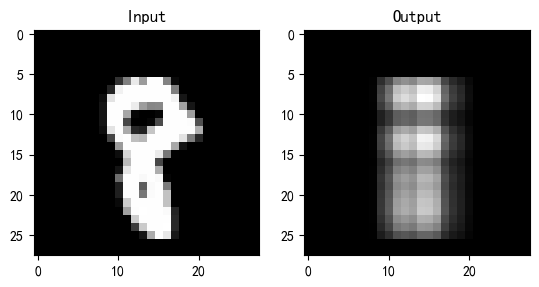

In [104]:
#图片输出显示
idx=random.randint(0, n-1)
showoff=training(IMAGE[idx,:,:])



ax = plt.subplot(1, 2, 1)
plt.title('Input')
plt.imshow(IMAGE[idx,:,:], cmap='gray')
ax = plt.subplot(1, 2, 2)
plt.title('Output')
plt.imshow(showoff, cmap='gray')

#解决中文显示问题
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

plt.savefig("./result/8_comp.jpg")
plt.show()